In [304]:
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [274]:
# db연결
conn = pymysql.connect(host="localhost", port=3306, db="project", 
                       user="humanda", password="humanda")

In [275]:
# 명령 도구 준비
cursor = conn.cursor()

In [276]:
sql = "select * from transportation"
sql2 = "select * from dates"


In [277]:
# db에서 데이터 불러오기
transportation = pd.read_sql_query(sql, conn)
date = pd.read_sql_query(sql2, conn)

C:\Users\human\AppData\Local\Temp\ipykernel_59864\776349629.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transportation = pd.read_sql_query(sql, conn)
C:\Users\human\AppData\Local\Temp\ipykernel_59864\776349629.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  date = pd.read_sql_query(sql2, conn)


In [278]:
# db 연결 종료
cursor.close()
conn.close()

In [279]:
# 불러온 데이터 확인
print(transportation.info())
print(date.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213374 entries, 0 to 213373
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   213374 non-null  int64  
 1   date                 213374 non-null  object 
 2   transportation_mode  213322 non-null  object 
 3   total_passenger      213374 non-null  int64  
 4   general_passenger    211861 non-null  float64
 5   child_passenger      94532 non-null   float64
 6   youth_passenger      126949 non-null  float64
 7   disabled_passenger   32972 non-null   float64
 8   elderly_passenger    28933 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 14.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  1035 non-null   int64 
 1   date  

In [280]:
print(transportation.head(5))
print(date.head(5))

   ID        date                         transportation_mode  \
0   1  2024-10-23  ①[지하철] → ②[지하철] → ③[지하철] → ④[지하철] → ⑤[지하철]   
1   2  2024-10-23           ①[지하철] → ②[지하철] → ③[지하철] → ④[지하철]   
2   3  2024-10-23   ①[지하철] → ②[지하철] → ③[지하철] → ④[버스] → ⑤[지하철]   
3   4  2024-10-23    ①[지하철] → ②[지하철] → ③[지하철] → ④[버스] → ⑤[버스]   
4   5  2024-10-23            ①[지하철] → ②[지하철] → ③[지하철] → ④[버스]   

   total_passenger  general_passenger  child_passenger  youth_passenger  \
0                1                1.0              NaN              NaN   
1               18               17.0              NaN              1.0   
2                1                1.0              NaN              NaN   
3                2                2.0              NaN              NaN   
4               27               27.0              NaN              NaN   

   disabled_passenger  elderly_passenger  
0                 NaN                NaN  
1                 NaN                NaN  
2                 NaN        

In [281]:
# transportation_mode 컬럼의 특수문자 및 공백 제거
transportation['transportation_mode'] = transportation['transportation_mode'].str.replace(r'[^가-힣]', '', regex=True).str.replace(' ', '')

In [282]:
# 사용할 컬럼들만 선택
transportation_1 = transportation[['date', 'transportation_mode','total_passenger']]
df_date = date[['date', 'holiday_or_weekend']]

In [283]:
# date가 object 타입이므로 datetime으로 변경
transportation_1['date'] = pd.to_datetime(transportation_1['date'])
df_date['date'] = pd.to_datetime(date['date'])

C:\Users\human\AppData\Local\Temp\ipykernel_59864\3959069005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transportation_1['date'] = pd.to_datetime(transportation_1['date'])
C:\Users\human\AppData\Local\Temp\ipykernel_59864\3959069005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['date'] = pd.to_datetime(date['date'])


In [ ]:
# transportation_mode의 버스와 지하철 승객수만 선택
# 22-01-01 ~ 24-10-31까지의 데이터를 사용 위해서 나머지 제외

transportation_df = transportation_1[(transportation_1['transportation_mode'] == "버스") | 
                                     (transportation_1['transportation_mode'] == "지하철")]

mask = (transportation_df['date'] > '2021-12-31')
transportation_df = transportation_df[mask]

In [ ]:
# transportation과 date 데이터 병합
transportation_merged = pd.merge(transportation_df, df_date, on = 'date', how = 'inner')

In [ ]:
# 병합된 데이터 확인
transportation_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 2040 non-null   datetime64[ns]
 1   transportation_mode  2040 non-null   object        
 2   total_passenger      2040 non-null   int64         
 3   holiday_or_weekend   2040 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 63.9+ KB


In [284]:
# 데이터 정렬하여 시작날짜와 종료날짜 확인)
sorted_transportation_merged = transportation_merged.sort_values(by='date', ascending=False)

# 정렬된 데이터프레임 출력
print(sorted_transportation_merged)

           transportation_mode  total_passenger  holiday_or_weekend
date                                                               
2024-10-23                 지하철          5033011                   0
2024-10-23                  버스          2419117                   0
2024-10-22                 지하철          4788389                   0
2024-10-22                  버스          2336455                   0
2024-10-21                 지하철          4865770                   0
...                        ...              ...                 ...
2022-01-03                  버스          1841131                   0
2022-01-02                  버스          1097581                   1
2022-01-02                 지하철          1812506                   1
2022-01-01                 지하철          1569829                   1
2022-01-01                  버스           988930                   1

[2040 rows x 3 columns]


In [294]:
# 버스와 지하철 각각의 기술통계
bus_passengers_description = transportation_merged[transportation_merged["transportation_mode"] == "버스"]['total_passenger'].describe()
print(bus_passengers_description)

print()

train_passengers_description = transportation_merged[transportation_merged["transportation_mode"] == "지하철"]['total_passenger'].describe()
print(train_passengers_description)

count    1.020000e+03
mean     2.038077e+06
std      3.755999e+05
min      7.096330e+05
25%      1.819274e+06
50%      2.184929e+06
75%      2.315579e+06
max      2.620989e+06
Name: total_passenger, dtype: float64

count    1.020000e+03
mean     4.114372e+06
std      9.574205e+05
min      1.084211e+06
25%      3.551149e+06
50%      4.496635e+06
75%      4.864922e+06
max      5.822260e+06
Name: total_passenger, dtype: float64


In [ ]:
# 데이터 양이 많기에 시각화 위해서 월별 데이터로 만들기 위해서 date를 인덱스로 설정)
transportation_merged.set_index('date', inplace=True)

In [ ]:
# 버스와 지하철로 그룹화 및 월별로 집계
transportation_monthly = transportation_merged.groupby('transportation_mode').resample('ME').sum(numeric_only=True)

In [ ]:
# 데이터 확인
transportation_monthly

total_passenger  holiday_or_weekend
transportation_mode date                                           
버스                  2022-01-31         51986985                  11
                    2022-02-28         45342187                  10
                    2022-03-31         52476642                  10
                    2022-04-30         59083944                   9
                    2022-05-31         64187657                  10
...                                         ...                 ...
지하철                 2024-06-30        129325580                  10
                    2024-07-31        130954829                   8
                    2024-08-31        124895246                  10
                    2024-09-30        121987844                  12
                    2024-10-31        100327351                   9

[68 rows x 2 columns]

In [ ]:
# 인덱스 설정한 것 초기화
transportation_monthly2 = transportation_monthly.reset_index()

In [ ]:
# 위와 같은 데이터로 시각화하면 말일 데이터를 기준으로 저장되어 월이 밀리게 됨
# 월만 나오게 하여 그러한 문제 해결

transportation_monthly2["date_month"] = transportation_monthly2['date'].map(lambda v: str(v)[:7])

In [ ]:
# date_month 확인
transportation_monthly2

,transportation_mode,date,total_passenger,holiday_or_weekend,date_month
0,버스,2022-01-31,51986985,11,2022-01
1,버스,2022-02-28,45342187,10,2022-02
2,버스,2022-03-31,52476642,10,2022-03
3,버스,2022-04-30,59083944,9,2022-04
4,버스,2022-05-31,64187657,10,2022-05
...,...,...,...,...,...
63,지하철,2024-06-30,129325580,10,2024-06
64,지하철,2024-07-31,130954829,8,2024-07
65,지하철,2024-08-31,124895246,10,2024-08
66,지하철,2024-09-30,121987844,12,2024-09


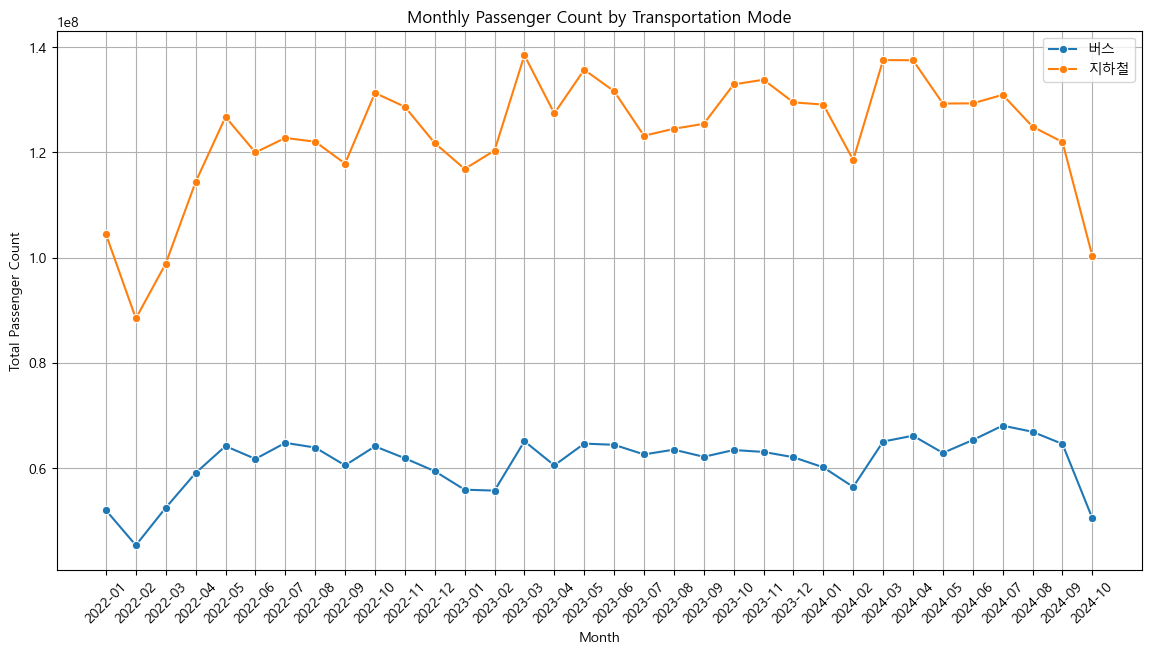

In [ ]:
# 월별 승객수 시각화

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(14, 7))
sns.lineplot(data=transportation_monthly2, x='date_month', y='total_passenger', hue='transportation_mode', marker='o')
plt.title('Monthly Passenger Count by Transportation Mode')
plt.xlabel('Month')
plt.ylabel('Total Passenger Count')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 평일과 주말&공휴일의 승객수 평균 비교를 위해 데이터 준비
avg_summary = transportation_merged.groupby('holiday_or_weekend')['total_passenger'].mean().reset_index()
avg_summary['holiday_or_weekend'] = avg_summary['holiday_or_weekend'].map({0: 'Weekday', 1: 'holiday_or_weekend'})


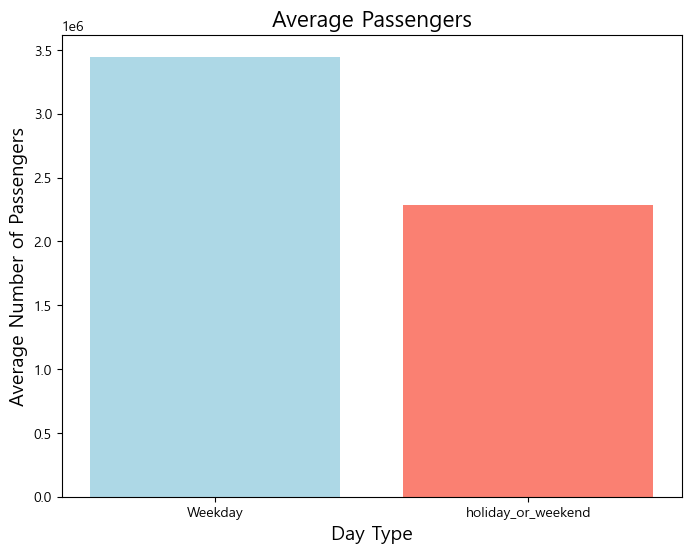

In [ ]:
# 시각화
plt.figure(figsize=(8, 6))
plt.bar(avg_summary['holiday_or_weekend'], avg_summary['total_passenger'], color=['lightblue', 'salmon'])

plt.title('Average Passengers', fontsize=16)
plt.xlabel('Day Type', fontsize=14)
plt.ylabel('Average Number of Passengers', fontsize=14)
plt.show()

In [ ]:
# 통행수단이 버스인 평일과 주말&공휴일의 기술통계량
bus_passengers_description = {}

for holiday_status in [0, 1]:
    bus_passengers_description[holiday_status] = transportation_merged[
        (transportation_merged["transportation_mode"] == "버스") &
        (transportation_merged['holiday_or_weekend'] == holiday_status)
    ]['total_passenger'].describe()

pprint(bus_passengers_description)

{0: count    6.930000e+02
mean     2.241276e+06
std      1.902790e+05
min      1.002577e+06
25%      2.174548e+06
50%      2.277074e+06
75%      2.358345e+06
max      2.620989e+06
Name: total_passenger, dtype: float64,
 1: count    3.270000e+02
mean     1.607443e+06
std      3.005440e+05
min      7.096330e+05
25%      1.418714e+06
50%      1.580566e+06
75%      1.840295e+06
max      2.485766e+06
Name: total_passenger, dtype: float64}


In [308]:
# 통행수단이 지하철인 평일과 주말&공휴일의 기술통계량
train_passengers_description = {}

for holiday_status in [0, 1]:
    train_passengers_description[holiday_status] = transportation_merged[
        (transportation_merged["transportation_mode"] == "지하철") &
        (transportation_merged['holiday_or_weekend'] == holiday_status)
    ]['total_passenger'].describe()

pprint(train_passengers_description)

{0: count    6.930000e+02
mean     4.654478e+06
std      4.653218e+05
min      1.665448e+06
25%      4.483181e+06
50%      4.758948e+06
75%      4.955454e+06
max      5.822260e+06
Name: total_passenger, dtype: float64,
 1: count    3.270000e+02
mean     2.969744e+06
std      6.865286e+05
min      1.084211e+06
25%      2.511364e+06
50%      2.873763e+06
75%      3.553690e+06
max      5.088320e+06
Name: total_passenger, dtype: float64}


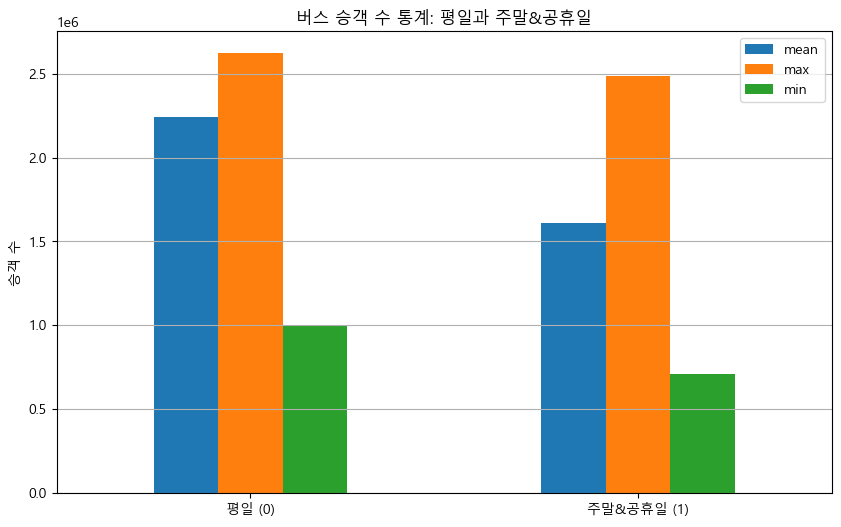

In [318]:
# 위에서 만든 기술통계량을 이용하여 시각화
# 통계 값 추출
statistics_bus = pd.DataFrame(bus_passengers_description).T
statistics_bus = statistics_bus[['mean', 'max', 'min']]

# 버스 시각화
statistics_bus.index = ['평일 (0)', '주말&공휴일 (1)']
statistics_bus.plot(kind='bar', figsize=(10, 6))
plt.title('버스 승객 수 통계: 평일과 주말&공휴일')
plt.xticks(rotation=0)
plt.ylabel('승객 수')
plt.grid(axis='y')
plt.show()

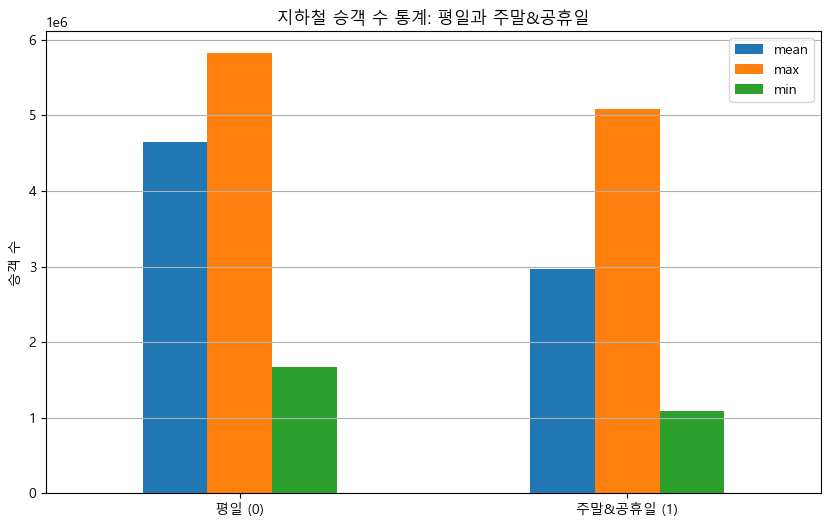

In [ ]:
# 통계 값 추출
statistics_train = pd.DataFrame(train_passengers_description).T
statistics_train = statistics_train[['mean', 'max', 'min']]

# 지하철 시각화
statistics_train.index = ['평일 (0)', '주말&공휴일 (1)']
statistics_train.plot(kind='bar', figsize=(10, 6))
plt.title('지하철 승객 수 통계: 평일과 주말&공휴일')
plt.xticks(rotation=0)
plt.ylabel('승객 수')
plt.grid(axis='y')
plt.show()